# Import library

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Fungsi memanggil dataset

In [4]:
df = pd.read_csv('Mobile phone price.csv')

# <font color='a31688'><b>Business Understanding</b></font>

Tahap Business Understanding pada proyek ini bertujuan untuk memahami masalah bisnis, yaitu bagaimana meningkatkan akurasi estimasi harga handphone agar dapat memberikan informasi yang lebih akurat bagi pelanggan dan membantu perusahaan dalam pengambilan keputusan bisnis yang lebih baik.

# <font color='#a31688'><b>Deskirpsi dataset/Data Understanding</b></font>

- Brand            = Adalah perusahaan yang mem-produksi handphone tersebut
- Model            = Nama unik dari suatu seri produksi handphone
- Storage          = Ukuran penyimpanan/memory internal dari handphone tersebut
- RAM              = Berfungsi sebagai tempat penyimpanan data sementara dan hanya bekerja saat perangkat tersebut hidup
- Screen Size      = Ukuran layar dari handphone tersebut, dijelaskan dalam ukuran inches
- Camera           = Resolusi dan jumlah kamera dari handphone tersebut, dijelaskan dalam ukuran MegaPixel
- Battery Capacity = Ukuran/kapasitas batterai dari handphone tersebut, dijelaskan dalam ukuran mAh
- Price            = Harga dari perangkat handphone tersebut

In [5]:
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


# <font color='#a31688'><b>Data Preparation</b></font>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [7]:
df.isna().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

# Merubah data menjadi integer

#   Price

In [8]:
y = [x for x in df['Price ($)'] if x.isnumeric() == False]
print(y)

['$799 ', '$799 ', '$399 ', '$699 ', '$329 ', '$399 ', '$999 ', '$699 ', '$699 ', '$549 ', '$1,299 ', '$999 ', '$899 ', '$399 ', '$449 ', '$319 ', '$269 ', '$349 ', '$269 ', '$279 ', '$249 ', '$349 ', '$699 ', '$699 ', '$299 ', '$999 ', '$969 ', '$1,199 ', '$149 ', '$139 ', '$99 ', '$699 ', '$99 ', '$199 ', '$169 ', '$999 ', '$499 ', '$399 ', '$799 ', '$179 ', '$219 ', '$249 ', '$149 ', '$199 ', '$279 ', '$179 ', '$899 ', '$269 ', '$229 ', '$399 ', '$239 ', '$149 ', '$279 ', '$329 ', '$149 ', '$549 ', '$449 ', '$279 ', '$199 ', '$399 ', '$179 ', '$399 ', '$109 ', '$219 ', '$149 ', '$299 ', '$279 ', '$149 ', '$189 ', '$169 ', '$389 ', '$1,199 ', '$299 ', '$219 ', '$299 ', '$149 ', '$249 ', '$219 ', '$249 ', '$179 ', '$299 ', '$309 ', '$179 ', '$369 ', '$349 ', '$499 ', '$199 ', '$229 ', '$299 ', '$129 ', '$449 ', '$499 ', '$279 ', '$399 ', '$849 ', '$279 ', '$299 ', '$249 ', '$149 ', '$199 ', '$469 ', '$329 ', '$279 ', '$369 ', '$269 ', '$329 ', '$299 ', '$299 ', '$239 ', '$329 ', '$149

In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def removing_punctuation_df(df, column_name):
    """
    This function looks at a certain column. It then iterates through each row, first changing the object message
    into a string. Then it checks for any punctuations in the message and gets rid of them. Then we take the
    message and turn it into a integer and add it into a list.
    """
    removed_df = []
    for a in df[column_name]:
        message = str(a)
        punct_removed = [char for char in message if char not in string.punctuation]
        punct_removed = ''.join(punct_removed)
        punct_removed = int(punct_removed)
        removed_df.append(punct_removed)
    return removed_df

In [11]:
Price = removing_punctuation_df(df, 'Price ($)') 
df['Price'] = Price
df = df.drop(['Price ($)'], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price                   407 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 25.6+ KB


# RAM, Storage, Screen size

In [13]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

In [14]:
y = [x for x in df['Screen Size (inches)'] if isfloat(x) == False]
print(y)

['6.8 + 3.9', '7.6 (unfolded)']


In [15]:
y = [x for x in df['Storage '] if x.isnumeric() == False]
print(y)

['128 GB', '256 GB', '128 GB', '128 GB', '128 GB', '128 GB', '256 GB', '128 GB', '128 GB', '256 GB', '128 GB', '128 GB', '128 GB', '64 GB', '256 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '64 GB', '32 GB', '128 GB', '32 GB', '128 GB', '128 GB', '128 GB', '64 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '64 GB', '64 GB', '64 GB', '64 GB', '64 GB', '128 GB', '128 GB', '64 GB', '128 GB', '128 GB', '64 GB', '64 GB', '128 GB', '256 GB', '64 GB', '32 GB', '128 GB', '128 GB', '128 GB', '256 GB', '128 GB', '128 GB', '128 GB', '64 GB', '64 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '64 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '256 GB', '64 GB', '128GB', '128GB', '128GB', '128GB', '128GB', '128GB', '256GB', '256GB', '256GB', '128GB', '128GB', '256GB', '256GB', '64GB', '128GB', '128GB', '128GB', '128GB', '128GB', '128GB', '64GB', '128GB', '128GB', '64GB', '32GB', '128GB', '256GB', '256GB', 

In [16]:
y = [x for x in df['RAM '] if x.isnumeric() == False]
print(y)

['6 GB', '12 GB', '8 GB', '6 GB', '8 GB', '4 GB', '8 GB', '6 GB', '8 GB', '12 GB', '6 GB', '6 GB', '8 GB', '4 GB', '12 GB', '6 GB', '8 GB', '6 GB', '6 GB', '8 GB', '6 GB', '4 GB', '6 GB', '8 GB', '6 GB', '4 GB', '3 GB', '6 GB', '3 GB', '4 GB', '6 GB', '4 GB', '3 GB', '6 GB', '8 GB', '4 GB', '6 GB', '8 GB', '4 GB', '3 GB', '3 GB', '4 GB', '4 GB', '8 GB', '8 GB', '4 GB', '8 GB', '4 GB', '4 GB', '4 GB', '4 GB', '4 GB', '4 GB', '2 GB', '6 GB', '4 GB', '4 GB', '6 GB', '8 GB', '8 GB', '12 GB', '4 GB', '3 GB', '8 GB', '8 GB', '6 GB', '8 GB', '6 GB', '3 GB', '4 GB', '4 GB', '4 GB', '8 GB', '6 GB', '4 GB', '12 GB', '4 GB', '4GB', '8GB', '8GB', '8GB', '6GB', '8GB', '12GB', '12GB', '12GB', '6GB', '8GB', '8GB', '8GB', '4GB', '6GB', '6GB', '8GB', '8GB', '8GB', '6GB', '4GB', '6GB', '6GB', '6GB', '3GB', '8GB', '12GB', '12GB', '3GB', '3GB', '3GB', '6GB', '2GB', '6GB', '4GB', '8GB', '6GB', '6GB', '12GB', '4GB', '6GB', '4GB', '4GB', '4GB', '6GB', '4GB', '8GB', '6GB', '6GB', '6GB', '4GB', '3GB', '6GB', '

In [17]:
df.iloc[88,4] = 6.8
df.iloc[373,4] = 7.8

In [18]:
df['Screen Size (in)'] = [float(size) for size in df['Screen Size (inches)']]
df = df.drop('Screen Size (inches)', axis=1)

In [19]:
def no_GBs(df, column):
    y = []
    for x in df[column]:
        string = x.replace("GB", "")
        string = int(string)
        y.append(string)
    return y

In [20]:
RAM = no_GBs(df, "RAM ")
df['RAM'] = RAM
df = df.drop('RAM ', axis=1)

In [21]:
Storage = no_GBs(df, 'Storage ')
df['Storage'] = Storage
df = df.drop('Storage ', axis=1)

In [22]:
df['Brand'] = df['Brand'].str.lower()
df['Model'] = df['Model'].str.lower()

# Merubah nama kolom

In [63]:
df.rename(columns = {"jumlah kamera": "JumlahKamera","Battery Capacity (mAh)": "BatteryCapacity","Screen Size (in)": "ScreenSize"},inplace=True)

In [64]:
df.head()

,Brand,Model,BatteryCapacity,Price,ScreenSize,RAM,Storage,JumlahKamera,res1,res2,res3,res4
0,apple,iphone 13 pro,3095,999,6.10,6,128,3,12,12,12,0
1,samsung,galaxy s21 ultra,5000,1199,6.80,12,256,4,108,10,10,12
2,oneplus,9 pro,4500,899,6.70,8,128,4,48,50,8,2
3,xiaomi,redmi note 10 pro,5020,279,6.67,6,128,4,64,8,5,2
4,google,pixel 6,4614,799,6.40,8,128,2,50,12.2,0,0


# Split nilai kamera dan membuat kolom jumlah kamera

In [ ]:
df['jumlah kamera'] = df['Camera (MP)'].str.count('\\+') + 1

In [24]:
df['jumlah kamera'].unique()

array([3, 4, 2, 1], dtype=int64)

In [65]:
df.head()

,Brand,Model,BatteryCapacity,Price,ScreenSize,RAM,Storage,JumlahKamera,res1,res2,res3,res4
0,apple,iphone 13 pro,3095,999,6.10,6,128,3,12,12,12,0
1,samsung,galaxy s21 ultra,5000,1199,6.80,12,256,4,108,10,10,12
2,oneplus,9 pro,4500,899,6.70,8,128,4,48,50,8,2
3,xiaomi,redmi note 10 pro,5020,279,6.67,6,128,4,64,8,5,2
4,google,pixel 6,4614,799,6.40,8,128,2,50,12.2,0,0


In [26]:
res1 = []
res2 = []
res3 = []
res4 = []
for x in df['Camera (MP)']:
    resolutions = x.split('+')
    tam = len(resolutions)
    
    if tam == 1:
        res1.append(resolutions[0])
        res2.append('0')
        res3.append('0')
        res4.append('0')
    
    if tam == 2:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append('0')
        res4.append('0')
    
    if tam == 3:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append('0')
    
    if tam == 4:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append(resolutions[3])
    
df['res1'] = res1
df['res2'] = res2
df['res3'] = res3
df['res4'] = res4

df = df.drop(columns='Camera (MP)')

In [66]:
df.head()

,Brand,Model,BatteryCapacity,Price,ScreenSize,RAM,Storage,JumlahKamera,res1,res2,res3,res4
0,apple,iphone 13 pro,3095,999,6.10,6,128,3,12,12,12,0
1,samsung,galaxy s21 ultra,5000,1199,6.80,12,256,4,108,10,10,12
2,oneplus,9 pro,4500,899,6.70,8,128,4,48,50,8,2
3,xiaomi,redmi note 10 pro,5020,279,6.67,6,128,4,64,8,5,2
4,google,pixel 6,4614,799,6.40,8,128,2,50,12.2,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            407 non-null    object 
 1   Model            407 non-null    object 
 2   BatteryCapacity  407 non-null    int64  
 3   Price            407 non-null    int64  
 4   ScreenSize       407 non-null    float64
 5   RAM              407 non-null    int64  
 6   Storage          407 non-null    int64  
 7   jumlah kamera    407 non-null    int64  
 8   res1             407 non-null    object 
 9   res2             407 non-null    object 
 10  res3             407 non-null    object 
 11  res4             407 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 38.3+ KB


<Axes: >

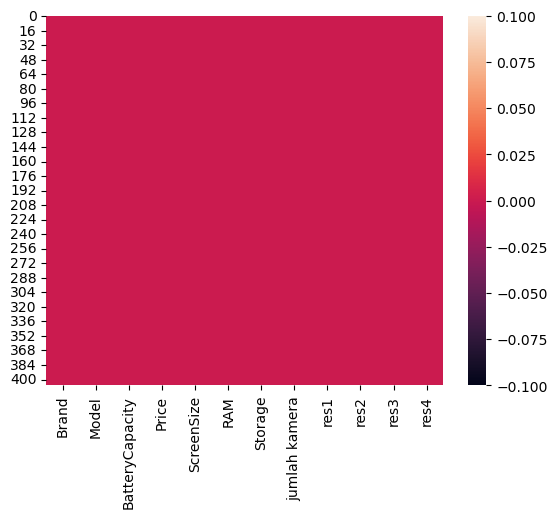

In [51]:
sns.heatmap(df.isnull())

# <font color='#a31688'><b>Pemahaman Data dan Visualisasi Data</b></font>

In [67]:
df.describe()

,BatteryCapacity,Price,ScreenSize,RAM,Storage,JumlahKamera
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,4676.476658,408.314496,6.471744,5.837838,123.046683,3.144963
std,797.193713,299.684768,0.322425,2.431980,64.963160,0.785408
min,1821.000000,99.000000,4.500000,2.000000,32.000000,1.000000
25%,4300.000000,199.000000,6.440000,4.000000,64.000000,3.000000
50%,5000.000000,299.000000,6.500000,6.000000,128.000000,3.000000
75%,5000.000000,499.000000,6.590000,8.000000,128.000000,4.000000
max,7000.000000,1999.000000,7.800000,16.000000,512.000000,4.000000


C:\Users\bmkus\AppData\Local\Temp\ipykernel_10456\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

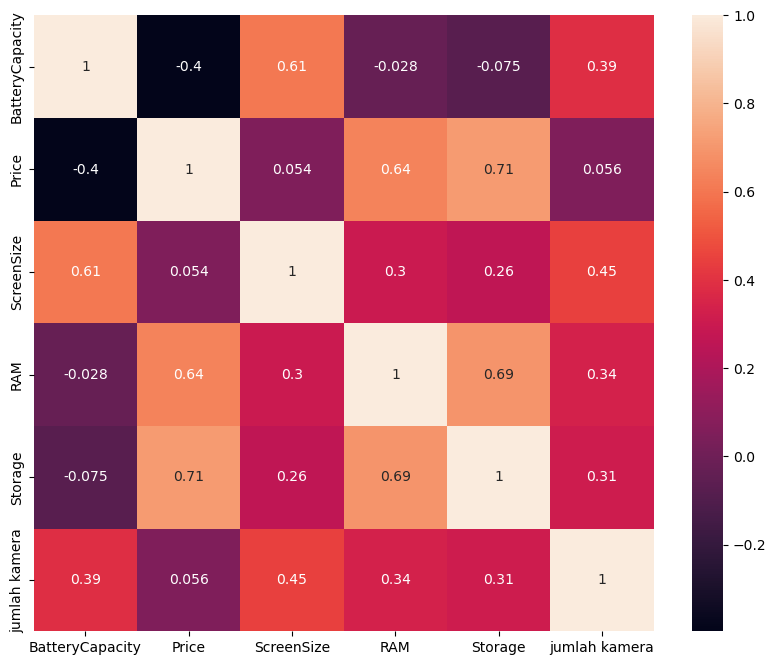

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Jumlah Handphone berdasarkan Brand

In [32]:
models = df.groupby('Brand').count()[['Storage']].sort_values(by='Storage',ascending=True).reset_index()
models = models.rename(columns={'Storage':'numberOfPhone'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'cat'),
  Text(1, 0, 'sony'),
  Text(2, 0, 'blackberry'),
  Text(3, 0, 'lg'),
  Text(4, 0, 'asus'),
  Text(5, 0, 'google'),
  Text(6, 0, 'huawei'),
  Text(7, 0, 'oneplus'),
  Text(8, 0, 'motorola'),
  Text(9, 0, 'nokia'),
  Text(10, 0, 'apple'),
  Text(11, 0, 'vivo'),
  Text(12, 0, 'realme'),
  Text(13, 0, 'oppo'),
  Text(14, 0, 'xiaomi'),
  Text(15, 0, 'samsung')])

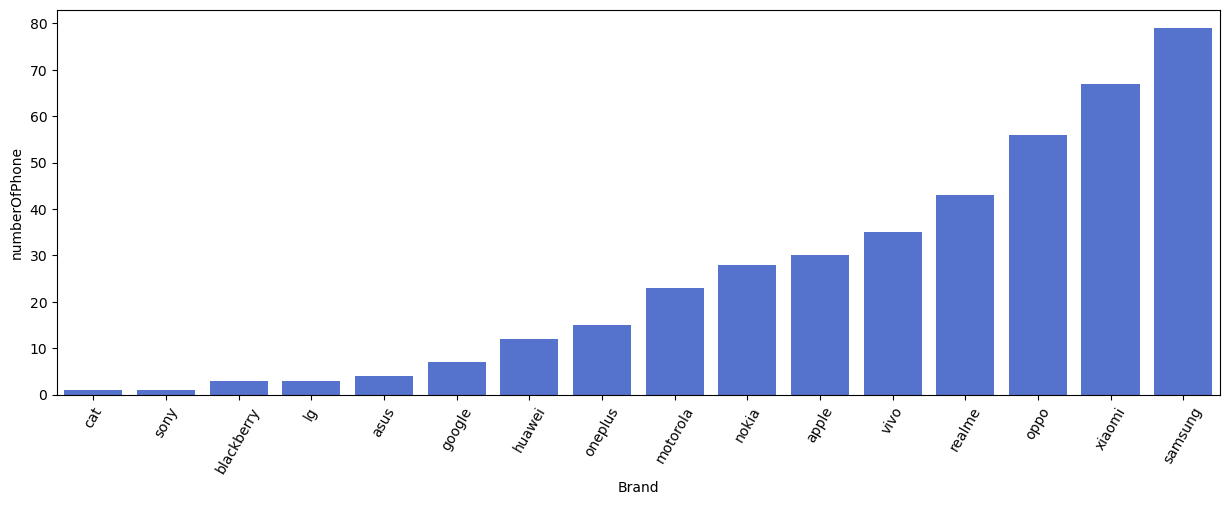

In [33]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['Brand'],y=models['numberOfPhone'],color='royalblue')
plt.xticks(rotation=60)

# Distribusi Harga Handphone

C:\Users\bmkus\AppData\Local\Temp\ipykernel_10456\1954555324.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

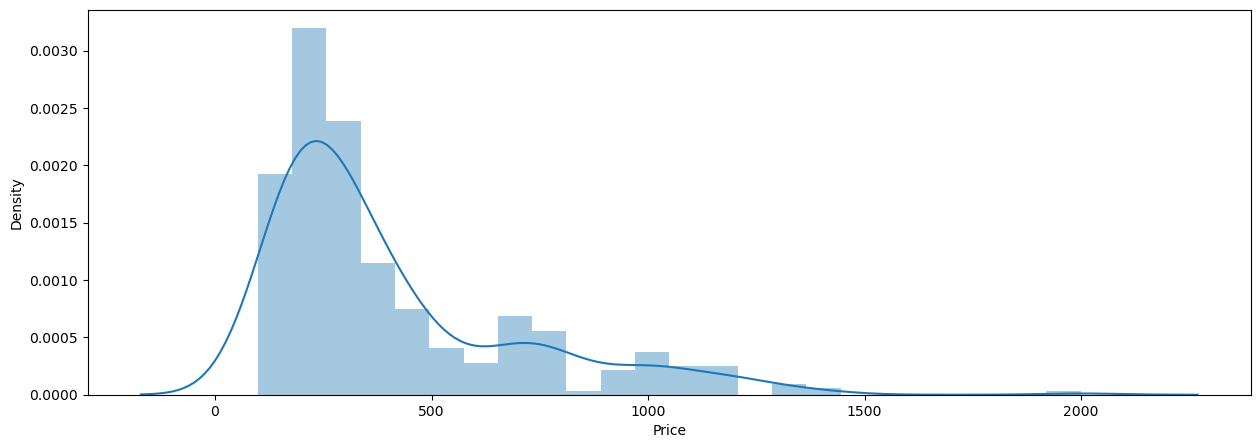

In [34]:
plt.figure(figsize=(15,5))
sns.distplot(df['Price'])

 # <font color='#a31688'><b>Modeling Data</b></font>

# Seleksi Feature

In [68]:
features = ['BatteryCapacity','ScreenSize','RAM','Storage','JumlahKamera']
x = df[features]
y = df['Price']
x.shape, y.shape

((407, 5), (407,))

# Split data training dan data testing

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=10)
y_test.shape

(102,)

# Membuat model Regresi Linear

In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

 # <font color='#a31688'><b>Evaluasi Model</b></font>

In [71]:
score = lr.score(x_test,y_test)
print('Akurasi model Regresi Linear', score)

Akurasi model Regresi Linear 0.7425685091348624


# Membuat Input Model Regresi Linear

In [72]:
# 'Battery Capacity (mAh)=5000','Screen Size (in)=6.40','RAM=6','Storage=256','jumlah kamera=3'
input_data = np.array([[5000,6.40,6,256,3]])

prediction = lr.predict(input_data)
print('Estimasi Harga Handphone dengan Spesk tersebut adalh :',prediction)

Estimasi Harga Handphone dengan Spesk tersebut adalh : [683.02704134]


c:\Users\bmkus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Saving Model

In [73]:
import pickle

filename = 'estimasi_harga_handphone.sav'
pickle.dump(lr,open(filename,'wb'))